In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

# Load the dataset, treating the first row as column names
df = pd.read_csv("agaricus-lepiota.data", header=0)

# Now df contains your data with the first row as column names
df.head()

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.describe()

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edibility                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises?                  8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

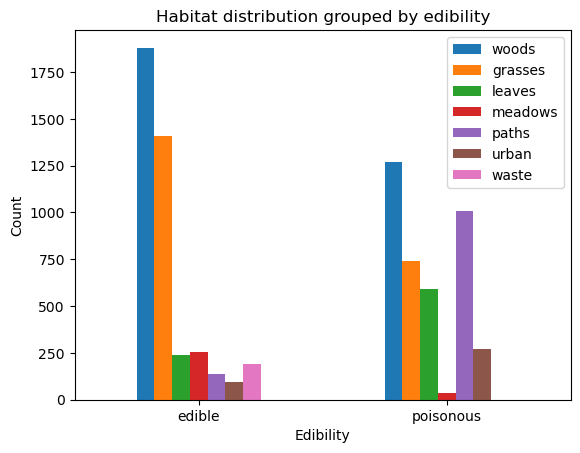

In [6]:
habitat_distribution = df.groupby(['edibility', 'habitat']).size().unstack()
ax = habitat_distribution.plot(kind='bar')
plt.title('Habitat distribution grouped by edibility')
plt.xlabel('Edibility')
plt.ylabel('Count')
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = ['edible' if label == 'e' else 'poisonous' if label == 'p' else label for label in labels]
ax.set_xticklabels(labels, rotation=0)
aliases = {
    'g': 'grasses',
    'l': 'leaves',
    'm': 'meadows',
    'p': 'paths',
    'u': 'urban',
    'w': 'waste',
    'd': 'woods'
}
plt.legend(habitat_distribution.columns.map(lambda x: aliases[x]), loc='best')
plt.show()

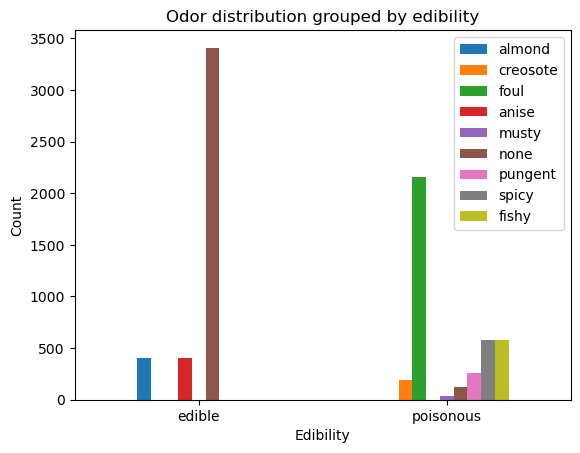

In [7]:
odor_distribution = df.groupby(['edibility', 'odor']).size().unstack()
ax = odor_distribution.plot(kind='bar')
plt.title('Odor distribution grouped by edibility')
plt.xlabel('Edibility')
plt.ylabel('Count')

labels = [item.get_text() for item in ax.get_xticklabels()]
labels = ['edible' if label == 'e' else 'poisonous' if label == 'p' else label for label in labels]
ax.set_xticklabels(labels, rotation=0)
# Define aliases with 'a' first
aliases = {
    'a': 'almond',
    'l': 'anise',
    'c': 'creosote',
    'y': 'fishy',
    'f': 'foul',
    'm': 'musty',
    'n': 'none',
    'p': 'pungent',
    's': 'spicy'
}
plt.legend(odor_distribution.columns.map(lambda x: aliases[x]), loc='best')
plt.show()

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
vectorizer = TfidfVectorizer()
#vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(df)
indices = np.argsort(df.columns)

In [11]:
dummy = pd.get_dummies(df)
dummy.head()

,edibility_e,edibility_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


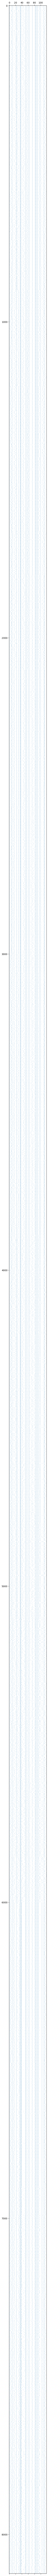

In [42]:
plt.spy(dummy, markersize=0.1)
fig = plt.gcf()
fig.set_size_inches(60,200)
plt.plot()
plt.show()